# About Dataset

It contains images of jaguar and a table with their labels, the images are cropped to only leave the masks and part of jaguars

# Exploration & Data loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image as Image
import os

In [8]:
# labels
label_table = pd.read_csv('../data/raw/train.csv')
label_table.head()

,filename,ground_truth
0,train_0001.png,Abril
1,train_0002.png,Abril
2,train_0003.png,Abril
3,train_0004.png,Akaloi
4,train_0005.png,Akaloi
...,...,...
1890,train_1891.png,Tomas
1891,train_1892.png,Tomas
1892,train_1893.png,Tomas
1893,train_1894.png,Tomas


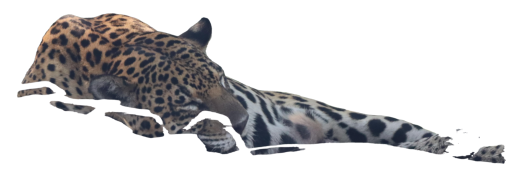

Label: Jaju


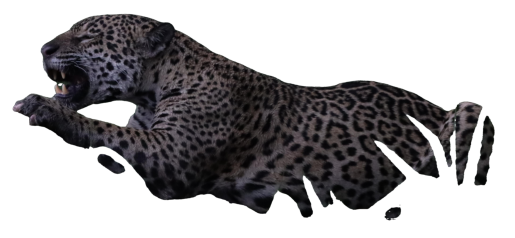

Label: Medrosa


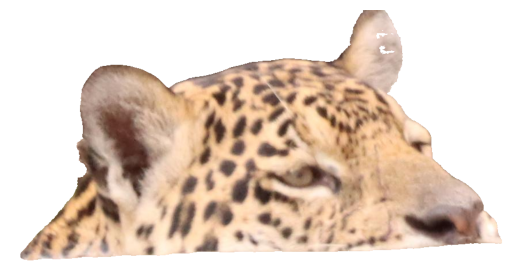

Label: Solar


In [18]:
train_image_path = '../data/raw/train/train'

def show_image(image_path):
    '''
    Show an image given its file path.
    Args:
        image_path (str): The file path of the image to be displayed.
    '''
    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

def show_random_images(label_table, num_images=5):
    '''
    Show random images from the training dataset and its label.
    Args:
        label_table (pd.DataFrame): The DataFrame containing image labels and paths.
        num_images (int): The number of random images to display.    
    '''
    random_indices = np.random.choice(label_table.index, size=num_images, replace=False)
    for idx in random_indices:
        image_id = label_table.loc[idx, 'filename']
        image_path = os.path.join(train_image_path, image_id)
        show_image(image_path)
        print("Label:", label_table.loc[idx, 'ground_truth'])

show_random_images(label_table, num_images=3)

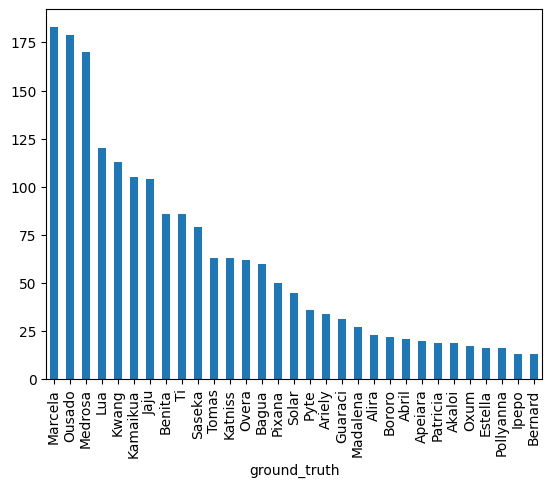

In [20]:
label_table['ground_truth'].value_counts().plot(kind='bar');

In [25]:
import io

In [28]:
import io
import tqdm

def is_corrupted_pil(image_path):
    try:
        with Image.open(image_path) as img:
            img.verify()  # Verify it's a valid image
            img = Image.open(image_path)  # Reopen for processing
            img.load()  # Load all pixel data
            # Check if image is mostly black
            histogram = img.convert('L').histogram()
            if sum(histogram[:50]) > sum(histogram) * 0.8:
                return "Likely too dark"
        return "OK"
    except Exception as e:
        return f"Corrupted: {str(e)}"
    
corruption_results = []
for idx, row in tqdm.tqdm(label_table.iterrows(), total=label_table.shape[0]):
    image_id = row['filename']
    image_path = os.path.join(train_image_path, image_id)
    result = is_corrupted_pil(image_path)
    corruption_results.append((image_id, result))

100%|██████████| 1895/1895 [16:22<00:00,  1.93it/s]


In [29]:
corruption_results

[('train_0001.png', 'OK'),
 ('train_0002.png', 'OK'),
 ('train_0003.png', 'OK'),
 ('train_0004.png', 'OK'),
 ('train_0005.png', 'OK'),
 ('train_0006.png', 'OK'),
 ('train_0007.png', 'OK'),
 ('train_0008.png', 'OK'),
 ('train_0009.png', 'OK'),
 ('train_0010.png', 'OK'),
 ('train_0011.png', 'OK'),
 ('train_0012.png', 'OK'),
 ('train_0013.png', 'OK'),
 ('train_0014.png', 'OK'),
 ('train_0015.png', 'OK'),
 ('train_0016.png', 'OK'),
 ('train_0017.png', 'OK'),
 ('train_0018.png', 'OK'),
 ('train_0019.png', 'OK'),
 ('train_0020.png', 'OK'),
 ('train_0021.png', 'OK'),
 ('train_0022.png', 'OK'),
 ('train_0023.png', 'OK'),
 ('train_0024.png', 'OK'),
 ('train_0025.png', 'OK'),
 ('train_0026.png', 'OK'),
 ('train_0027.png', 'OK'),
 ('train_0028.png', 'OK'),
 ('train_0029.png', 'OK'),
 ('train_0030.png', 'OK'),
 ('train_0031.png', 'OK'),
 ('train_0032.png', 'OK'),
 ('train_0033.png', 'OK'),
 ('train_0034.png', 'OK'),
 ('train_0035.png', 'OK'),
 ('train_0036.png', 'OK'),
 ('train_0037.png', 'OK'),
 

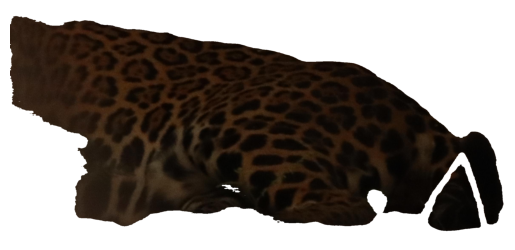

In [31]:
show_image(os.path.join(train_image_path, 'train_0085.png'))

In [32]:
def analyze_image_lighting(image_path):
    img = Image.open(image_path).convert('L')
    gray = np.array(img)

    brightness = np.mean(gray)
    contrast = gray.std()

    hist, _ = np.histogram(gray, bins=256, range=(0, 256))
    dark_pixels = np.sum(hist[:50]) / np.sum(hist) * 100

    return {
        'brightness': brightness,
        'contrast': contrast,
        'dark_percentage': dark_pixels,
        'is_dark': brightness < 40 or dark_pixels > 60,
        'low_contrast': contrast < 20
    }

image_analysis = analyze_image_lighting(os.path.join(train_image_path, 'train_0085.png'))
print(image_analysis)

{'brightness': np.float64(26.051425122978642), 'contrast': np.float64(12.186233117582264), 'dark_percentage': np.float64(97.60625394544076), 'is_dark': np.True_, 'low_contrast': np.True_}


In [33]:
lighting_contrast_results = []
for idx, row in tqdm.tqdm(label_table.iterrows(), total=label_table.shape[0]):
    image_id = row['filename']
    image_path = os.path.join(train_image_path, image_id)
    result = analyze_image_lighting(image_path)
    lighting_contrast_results.append((image_id, result))

100%|██████████| 1895/1895 [30:52<00:00,  1.02it/s] 


In [40]:
lighting_contrast_results[:5]

[('train_0001.png',
  {'brightness': np.float64(85.68299627551558),
   'contrast': np.float64(40.793494710817676),
   'dark_percentage': np.float64(20.616807189140456),
   'is_dark': np.False_,
   'low_contrast': np.False_}),
 ('train_0002.png',
  {'brightness': np.float64(85.28883382628406),
   'contrast': np.float64(40.65344063364728),
   'dark_percentage': np.float64(21.166221704655065),
   'is_dark': np.False_,
   'low_contrast': np.False_}),
 ('train_0003.png',
  {'brightness': np.float64(86.3950973247065),
   'contrast': np.float64(40.80252341457111),
   'dark_percentage': np.float64(21.134740419638383),
   'is_dark': np.False_,
   'low_contrast': np.False_}),
 ('train_0004.png',
  {'brightness': np.float64(99.18122811742526),
   'contrast': np.float64(23.909946887768285),
   'dark_percentage': np.float64(3.622407756531107),
   'is_dark': np.False_,
   'low_contrast': np.False_}),
 ('train_0005.png',
  {'brightness': np.float64(117.76512598251324),
   'contrast': np.float64(39.55

In [38]:
lighting_contrast_results_df = pd.DataFrame(lighting_contrast_results, columns=['filename', 'analysis'])
lighting_contrast_results_df = pd.concat([lighting_contrast_results_df.drop(['analysis'], axis=1), lighting_contrast_results_df['analysis'].apply(pd.Series)], axis=1)
lighting_contrast_results_df

,filename,brightness,contrast,dark_percentage,is_dark,low_contrast
0,train_0001.png,85.682996,40.793495,20.616807,False,False
1,train_0002.png,85.288834,40.653441,21.166222,False,False
2,train_0003.png,86.395097,40.802523,21.134740,False,False
3,train_0004.png,99.181228,23.909947,3.622408,False,False
4,train_0005.png,117.765126,39.554654,7.992894,False,False
...,...,...,...,...,...,...
1890,train_1891.png,67.354056,44.167820,45.777451,False,False
1891,train_1892.png,67.550716,44.466626,45.733179,False,False
1892,train_1893.png,70.388747,46.197381,43.971863,False,False
1893,train_1894.png,68.709547,44.904578,42.850348,False,False


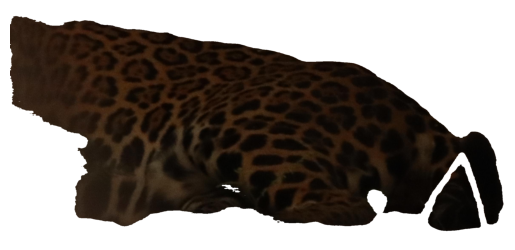

In [50]:
show_image(os.path.join(train_image_path, 'train_0085.png'))